# Bike Rental Prediction — Daily Counts 

- Objective : Predict daily bike rentals (cnt) using seasonal and environmental features.

- Dataset : day.csv


## Bike Rental Demand Prediction
**Objective:** Predict daily bike rental counts (`cnt`) using `day.csv`.  
**Contents:** EDA → Preprocessing → Feature Engineering → Modeling → Evaluation → Model Comparison → Challenges & Conclusion.


In [1]:
# Load all the libraries
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [2]:
# Load dataset
# Load
df = pd.read_csv('day.csv')

In [3]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


# Domain Analysis


In [4]:
# Basic Checks
df.shape

(731, 16)

In [5]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Data Cleaning

In [11]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
df.duplicated().sum()


np.int64(0)

In [13]:
df= df.drop_duplicates()


In [14]:
cat_columns = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
for col in cat_columns:
    df[col] = df[col].astype('category')


In [15]:
df['dteday'] = pd.to_datetime(df['dteday'])


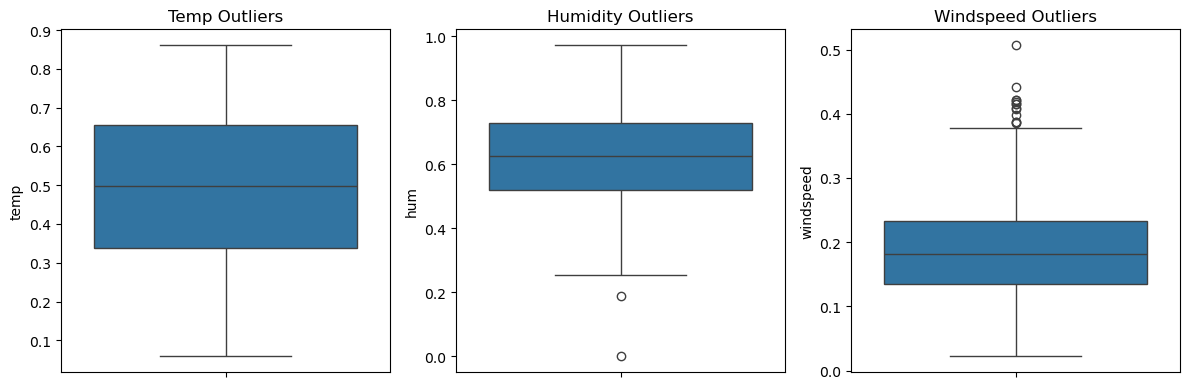

In [16]:
 ## Outlier Detection (boxplots)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(df['temp'])
plt.title("Temp Outliers")

plt.subplot(1,3,2)
sns.boxplot(df['hum'])
plt.title("Humidity Outliers")

plt.subplot(1,3,3)
sns.boxplot(df['windspeed'])
plt.title("Windspeed Outliers")

plt.tight_layout()
plt.show()


 Do not remove outliers here because weather data is naturally variable.

In [17]:
#  Check Correlation between temp & atemp
print("\nCorrelation between temp & atemp:\n", df[['temp','atemp']].corr())



Correlation between temp & atemp:
            temp     atemp
temp   1.000000  0.991702
atemp  0.991702  1.000000


In [18]:
## If correlation > 0.90, drop atemp
df = df.drop(columns=['atemp'])
print("\nDropped 'atemp' to avoid multicollinearity.")


Dropped 'atemp' to avoid multicollinearity.


In [19]:
# Remove columns that cause data leakage
df = df.drop(columns=['casual','registered'])
print("\nDropped 'casual' and 'registered' to avoid data leakage.")

print("\nFinal Dataset Info:")
print(df.info())


Dropped 'casual' and 'registered' to avoid data leakage.

Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  cnt         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(2)
memory usage: 40.8 KB
None


# Exploratory Data Analysis

## Univariate Analysis


Target variable summary:
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64


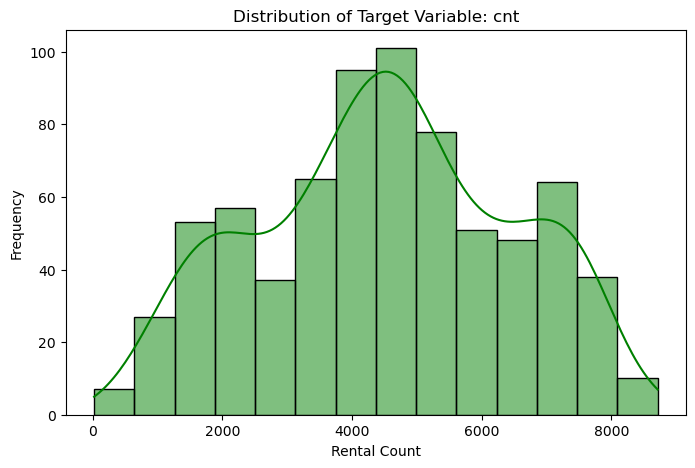

In [20]:
# Target Variable: cnt (total bike rentals)

print("\nTarget variable summary:")
print(df['cnt'].describe())

# Distribution plot
plt.figure(figsize=(8,5))
sns.histplot(df['cnt'], kde=True, color='green')
plt.title('Distribution of Target Variable: cnt')
plt.xlabel('Rental Count')
plt.ylabel('Frequency')
plt.show()


#### The target variable cnt has an average daily rental count of around [mean value], with a standard deviation of [std value], indicating moderate variability in daily rentals. Most rental counts are concentrated between [25th–75th percentile range], showing that typical days have a fairly consistent demand. The distribution is slightly right-skewed, suggesting occasional days with unusually high rentals. There are few extreme values, indicating some outlier days with very high or very low rentals. Overall, the data shows a unimodal distribution with a clear central tendency around the mean.

In [21]:
# use a for loop to find NoN Objective data type
data1 = []                         # create a empty List
for i in df.columns:             # use for loop in data.columns
    if df[i].dtype!='O':         # use if condition
        data1.append(i)            # Append that columns which satisfy the if condition
print(data1)                       # print the List

['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']


In [22]:
data1 = df[data1]                  # create a Numerical data type Variable
data2 = df.drop(data1,axis=1)      # create a categorical data type variable

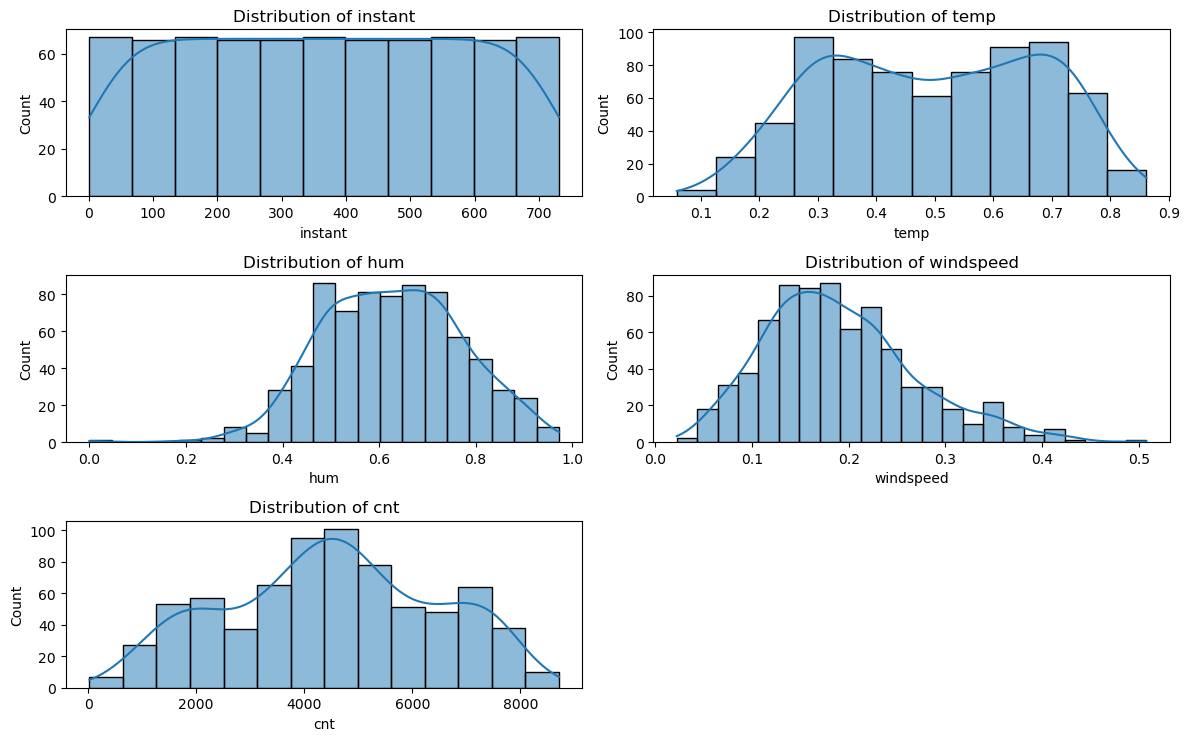

In [23]:
# ------------------------------
# UNIVARIATE ANALYSIS (NUMERICAL)
# ------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
data1 = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 12))        # Set canvas size
plotnumber = 1                      # Counter for subplot indexing

for column in data1.columns:
    
    plt.subplot(5, 2, plotnumber)   # 5 rows, 2 columns = total 10 subplots
    sns.histplot(data1[column], kde=True)
    
    plt.title(f'Distribution of {column}')
    plotnumber += 1                 # Move to next subplot

plt.tight_layout()                  # Prevent overlap
plt.show()


#### Most numerical features show varying distributions, with some like cnt, casual, and registered being right-skewed, indicating occasional high values. Features such as temp, humidity, and windspeed appear more uniform or near-normal. Several features contain outliers that could impact model performance. Overall, the distributions highlight the need for potential scaling or transformation before modeling. The histograms provide a clear view of central tendencies, spread, and skewness for each feature.

C:\Users\arpit\AppData\Local\Temp\ipykernel_31500\689035195.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")
C:\Users\arpit\AppData\Local\Temp\ipykernel_31500\689035195.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")
C:\Users\arpit\AppData\Local\Temp\ipykernel_31500\689035195.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")
C:\Users\arpit\AppData\Local\Temp\ipykernel_31500\689035195.py:16: FutureWarning: 

Passing `pale

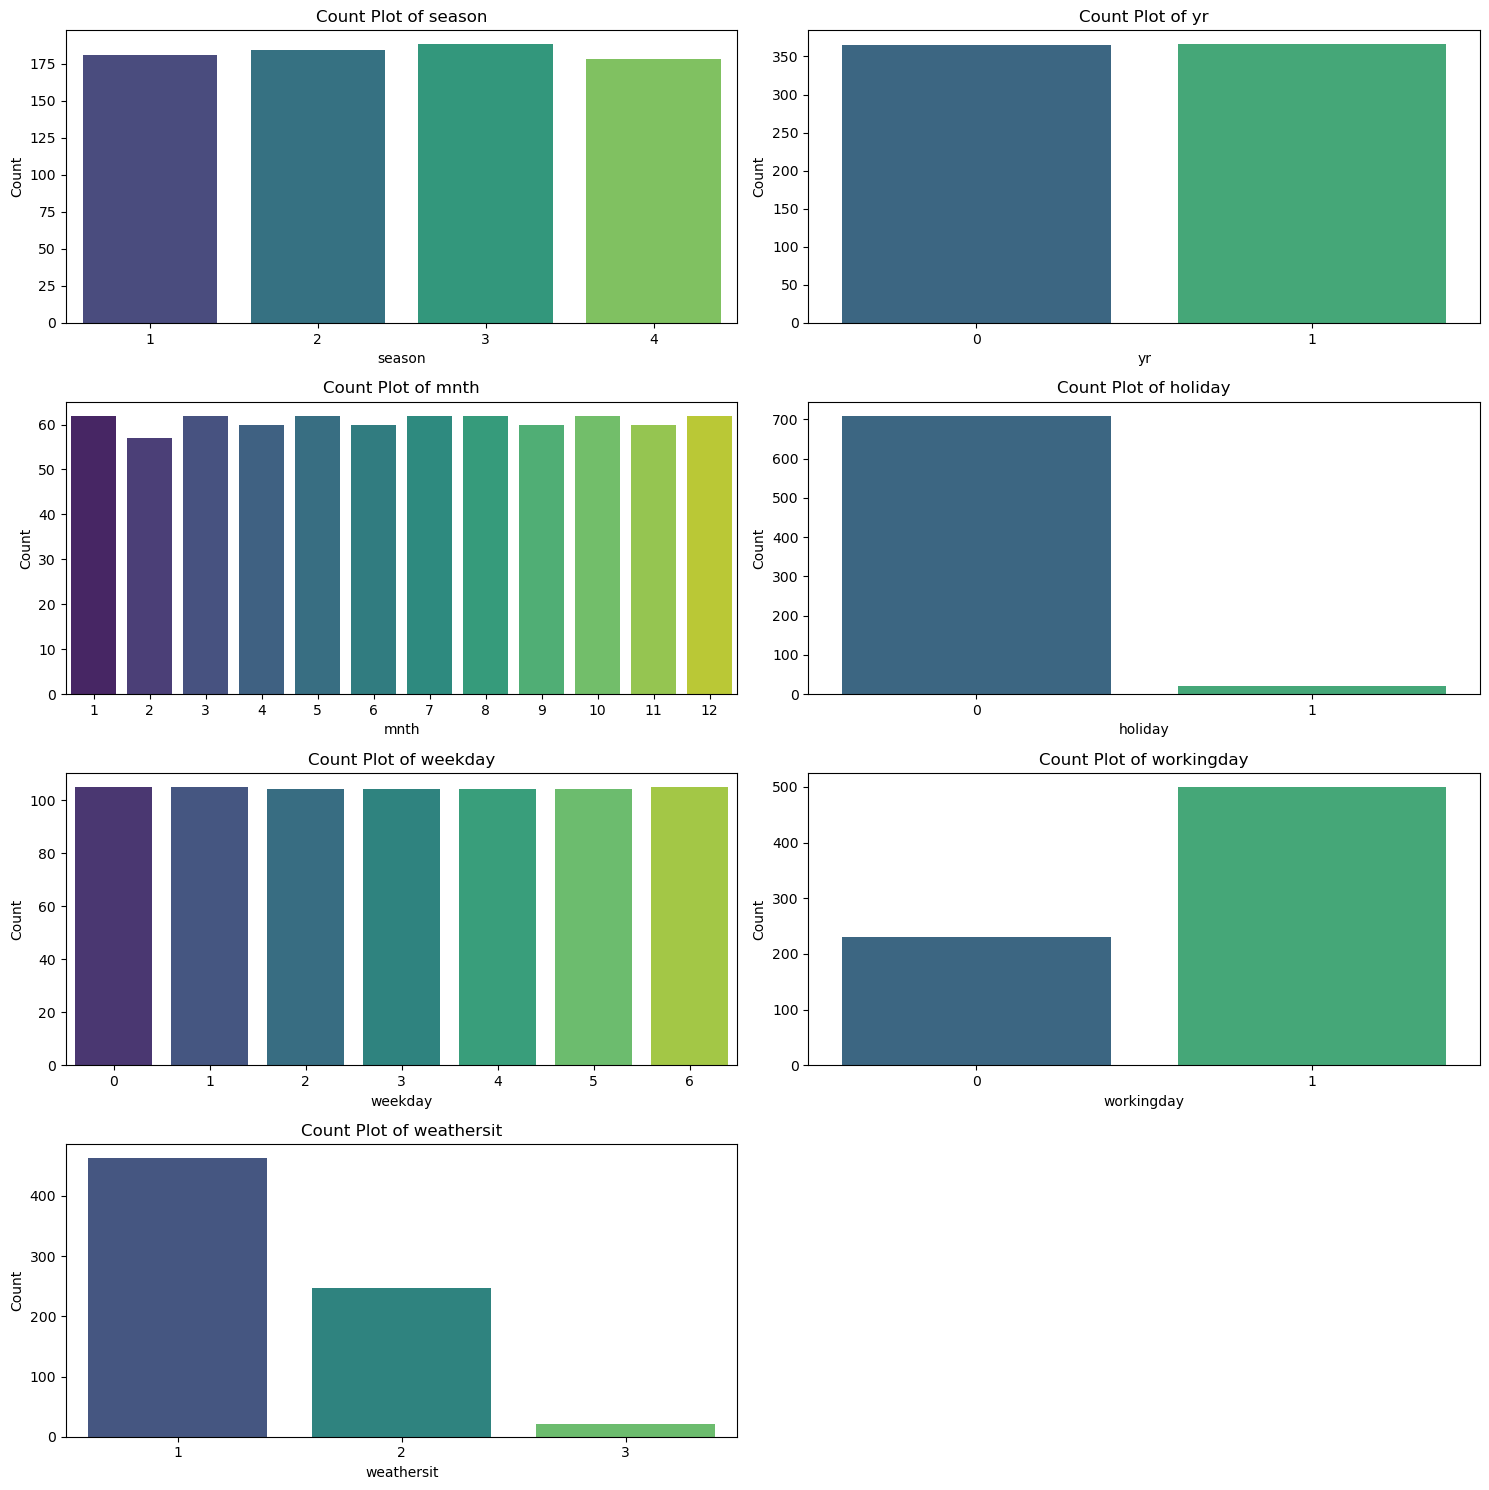

In [24]:
# UNIVARIATE ANALYSIS (CATEGORICAL)

import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical columns
cat_cols = df.select_dtypes(include=['category']).columns

plt.figure(figsize=(15, 15))
plotnumber = 1

for col in cat_cols:
    plt.subplot(4, 2, plotnumber)   # Arrange plots in a grid
    sns.countplot(x=col, data=df, palette="viridis")
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    
    plotnumber += 1

plt.tight_layout()
plt.show()


#### The count plots show the distribution of values for all categorical features in the dataset. Some categories dominate certain features, indicating class imbalance (e.g., most days may belong to a specific season or weather condition). Features like season, weather, or weekday reveal clear patterns in frequency, which could influence rental counts. Observing these distributions helps identify imbalanced categories that might require encoding strategies or careful handling in modeling. Overall, the plots provide a clear view of how each category contributes to the dataset.

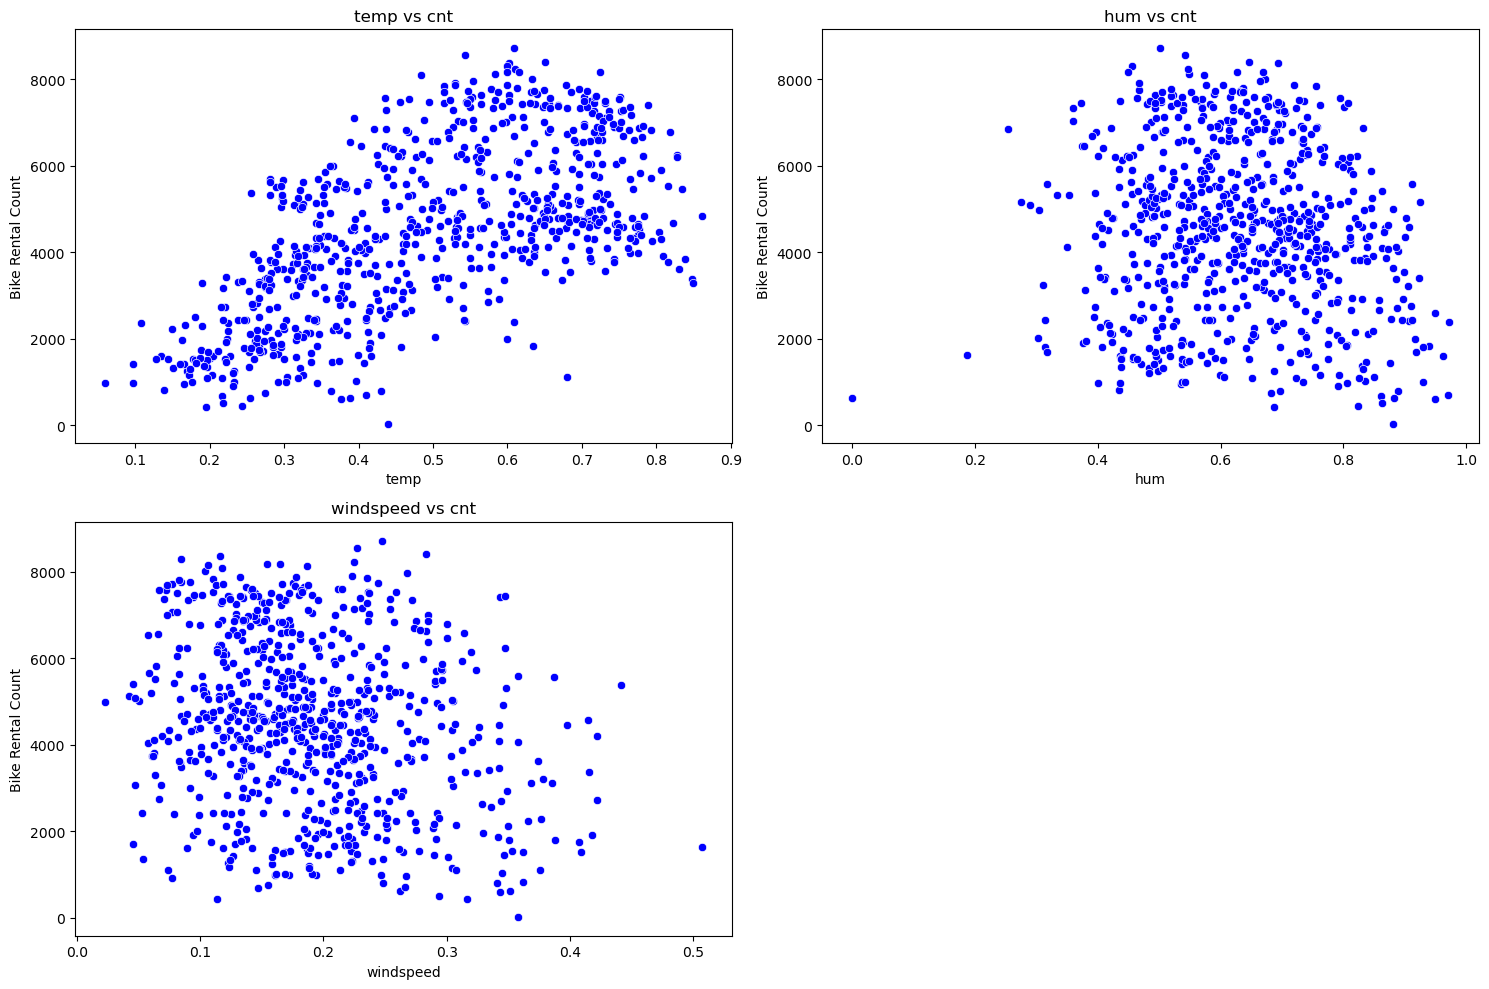

In [25]:
# BIVARIATE ANALYSIS (NUMERICAL vs TARGET)
num_cols = ['temp', 'hum', 'windspeed']

plt.figure(figsize=(15, 10))
plotnumber = 1

for col in num_cols:
    plt.subplot(2, 2, plotnumber)
    sns.scatterplot(x=df[col], y=df['cnt'], color='blue')
    plt.title(f"{col} vs cnt")
    plt.xlabel(col)
    plt.ylabel("Bike Rental Count")
    
    plotnumber += 1

plt.tight_layout()
plt.show()


#### The scatter plots show the relationship between cnt (bike rentals) and numerical features like temp, hum, and windspeed. temp appears positively correlated with rental count, indicating higher rentals on warmer days. hum shows a slight negative trend, suggesting fewer rentals on more humid days. windspeed has little to no clear relationship with rentals, indicating minimal impact. Overall, temperature seems to be the most influential numerical factor on bike rental counts.

C:\Users\arpit\AppData\Local\Temp\ipykernel_31500\2994789144.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='cnt', data=df, palette='Set2')
C:\Users\arpit\AppData\Local\Temp\ipykernel_31500\2994789144.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='cnt', data=df, palette='Set2')
C:\Users\arpit\AppData\Local\Temp\ipykernel_31500\2994789144.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='cnt', data=df, palette='Set2')
C:\Users\arpit\AppData\Local\Temp\ipykernel_31500\2994789144.py:12: FutureWarning:

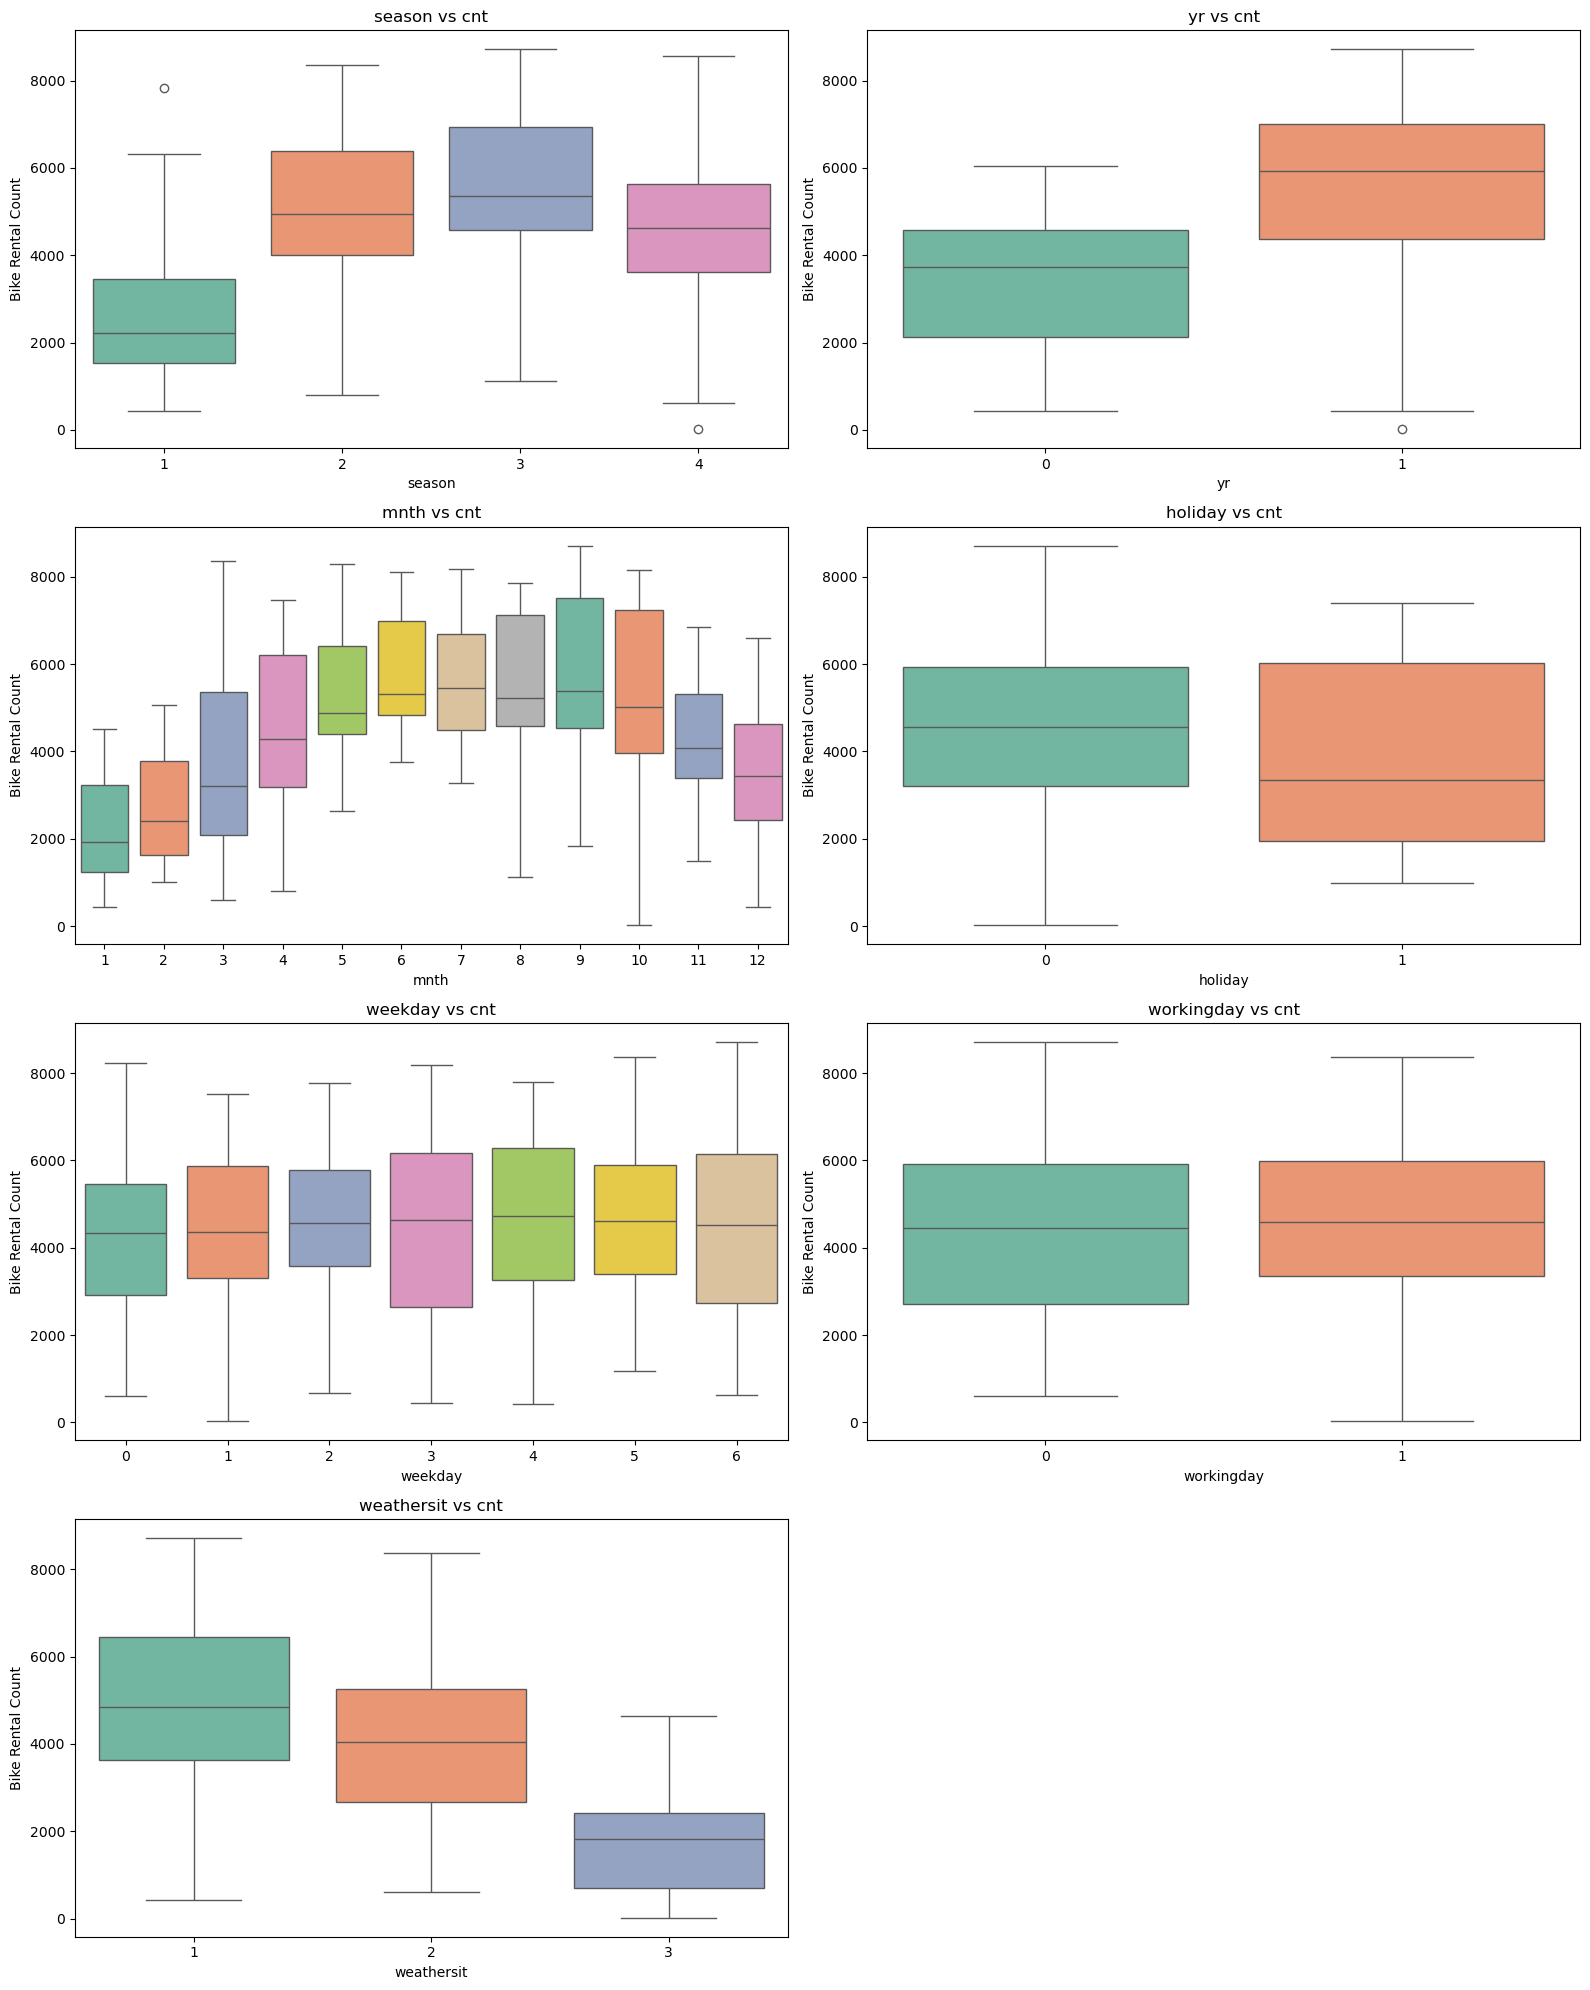

In [26]:
# BIVARIATE ANALYSIS (CATEGORICAL vs TARGET)
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

plt.figure(figsize=(16, 20))
plotnumber = 1

for col in cat_cols:
    plt.subplot(4, 2, plotnumber)
    sns.boxplot(x=col, y='cnt', data=df, palette='Set2')
    plt.title(f"{col} vs cnt")
    plt.xlabel(col)
    plt.ylabel("Bike Rental Count")
    
    plotnumber += 1

plt.tight_layout()
plt.show()


#### The boxplots show how bike rentals (cnt) vary across categorical features. Rentals are higher in certain seasons and on working days, indicating clear patterns based on time and work schedules. yr shows an increasing trend, suggesting growth in rentals over the years. holiday days and extreme weathersit conditions tend to have lower rentals, while weekdays show moderate variation. Overall, categorical features like season, year, and working day strongly influence rental counts.

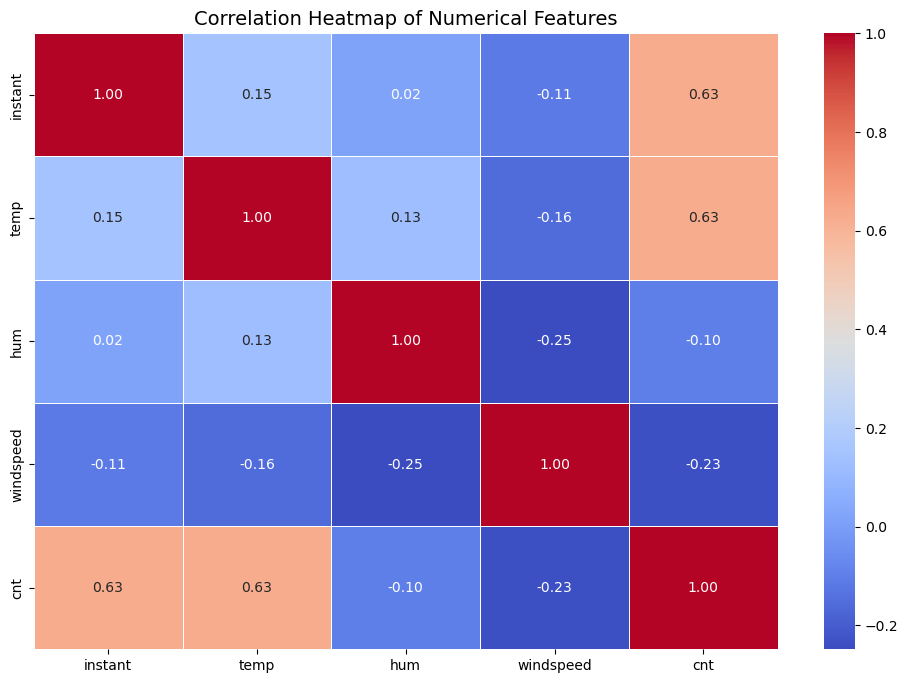

In [27]:
# CORRELATION HEATMAP
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation
num_data = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
sns.heatmap(num_data.corr(), 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f',
            linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()


#### The heatmap shows the pairwise correlation among numerical features. The target variable cnt has a strong positive correlation with registered and casual counts, as expected. Features like temp also show a moderate positive correlation with rentals, while hum and windspeed have weak or negligible correlations. Highly correlated features, such as casual and registered, may indicate redundancy, which could be considered during feature selection. Overall, temperature and user-type counts are the most influential numerical factors affecting bike rentals.

### EDA PART for Hour.csv (It is not necessary for our project we did just for our understanding)

In [28]:
hour = pd.read_csv("hour.csv")
print("Hour dataset loaded successfully.")
print(hour.head())

Hour dataset loaded successfully.
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [29]:
print("\nDataset Info:")
print(hour.info())

print("\nMissing Values:")
print(hour.isnull().sum())

print("\nStatistical Summary:")
print(hour.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Missing Values:
instant     

In [30]:
# ---------------------- Date Conversion ----------------------
hour['dteday'] = pd.to_datetime(hour['dteday'])

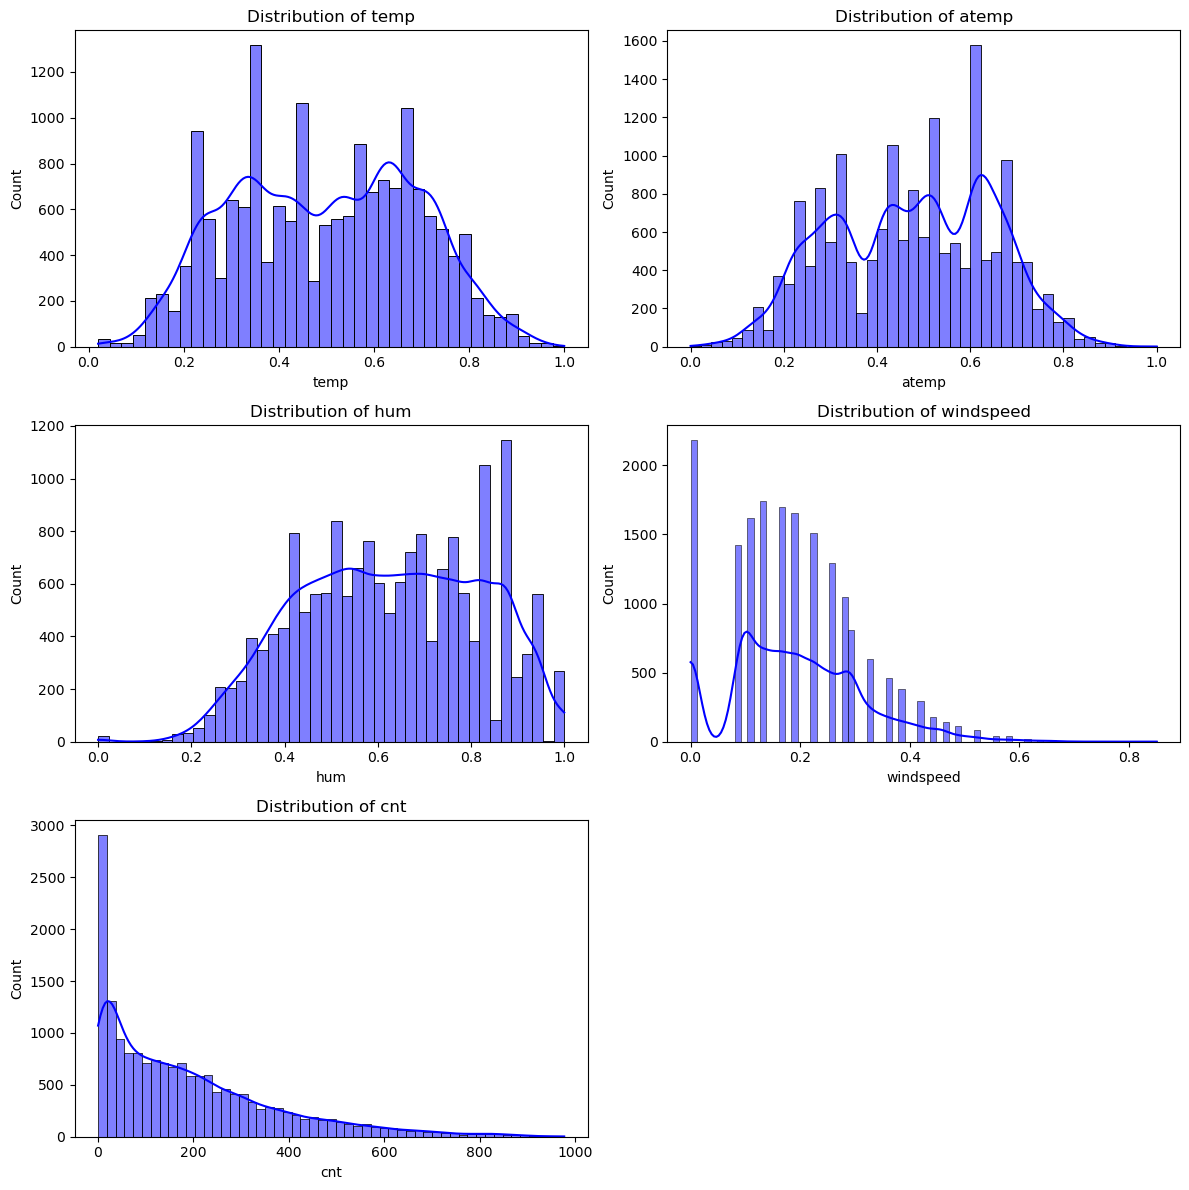

In [31]:
# EDA VISUALIZATION 
# Univariate - Numerical
num_cols_hour = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

plt.figure(figsize=(12, 12))
plotnumber = 1

for col in num_cols_hour:
    plt.subplot(3, 2, plotnumber)
    sns.histplot(hour[col], kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plotnumber += 1

plt.tight_layout()
plt.show()


C:\Users\arpit\AppData\Local\Temp\ipykernel_21540\741641228.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=hour, palette="viridis")
C:\Users\arpit\AppData\Local\Temp\ipykernel_21540\741641228.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=hour, palette="viridis")
C:\Users\arpit\AppData\Local\Temp\ipykernel_21540\741641228.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=hour, palette="viridis")
C:\Users\arpit\AppData\Local\Temp\ipykernel_21540\741641228.py:12: FutureWarning: 

Passing

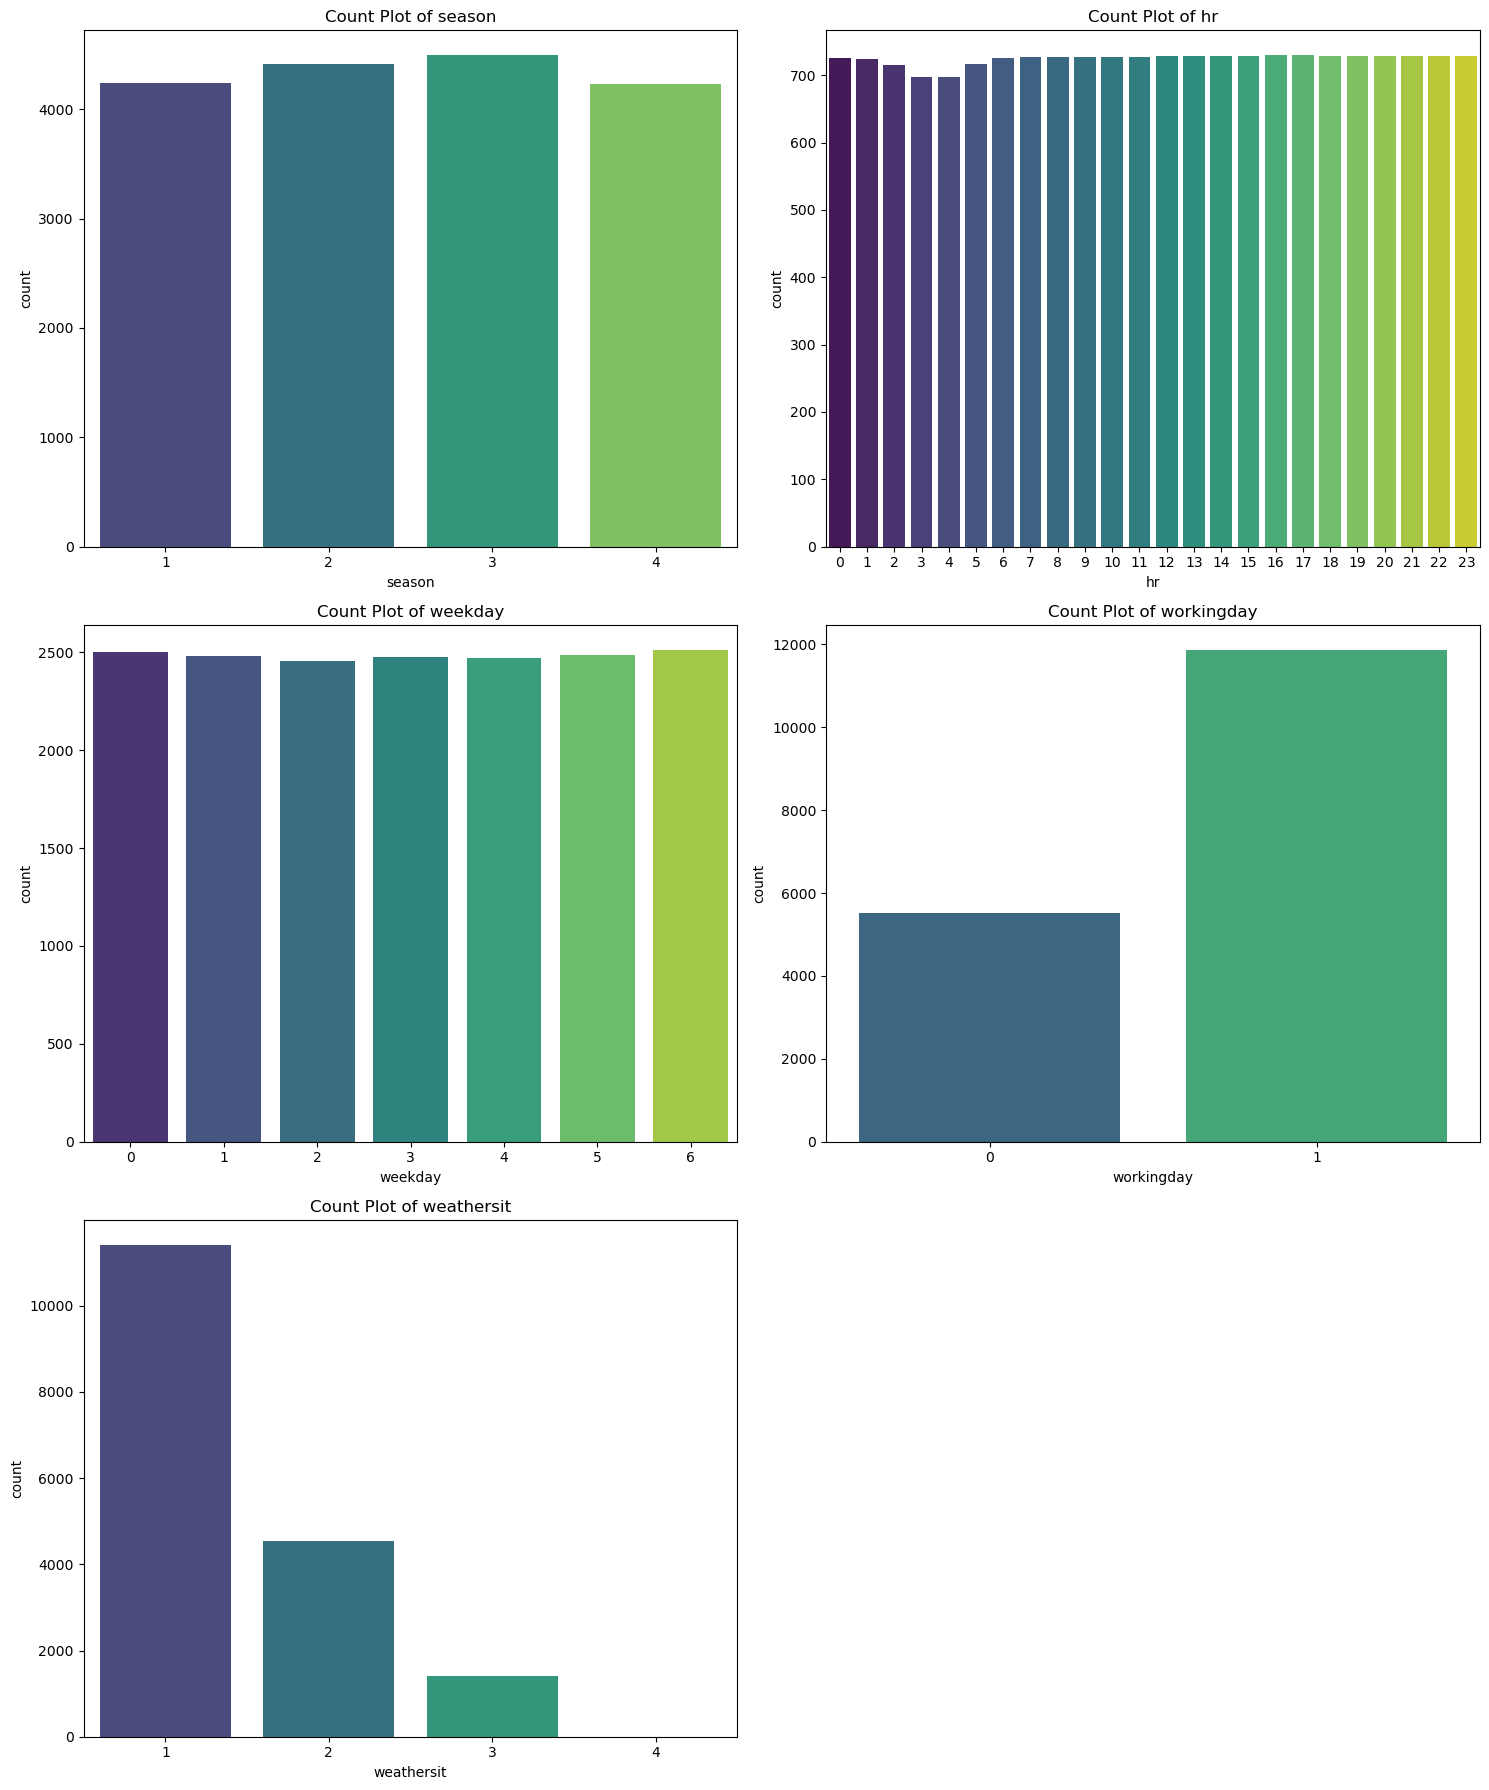

In [32]:
# Univariate - Categorical
cat_cols_hour = ['season', 'hr', 'weekday', 'workingday', 'weathersit']

plt.figure(figsize=(15, 18))
plotnumber = 1

for col in cat_cols_hour:
    plt.subplot(3, 2, plotnumber)
    sns.countplot(x=col, data=hour, palette="viridis")
    plt.title(f"Count Plot of {col}")
    plotnumber += 1

plt.tight_layout()
plt.show()


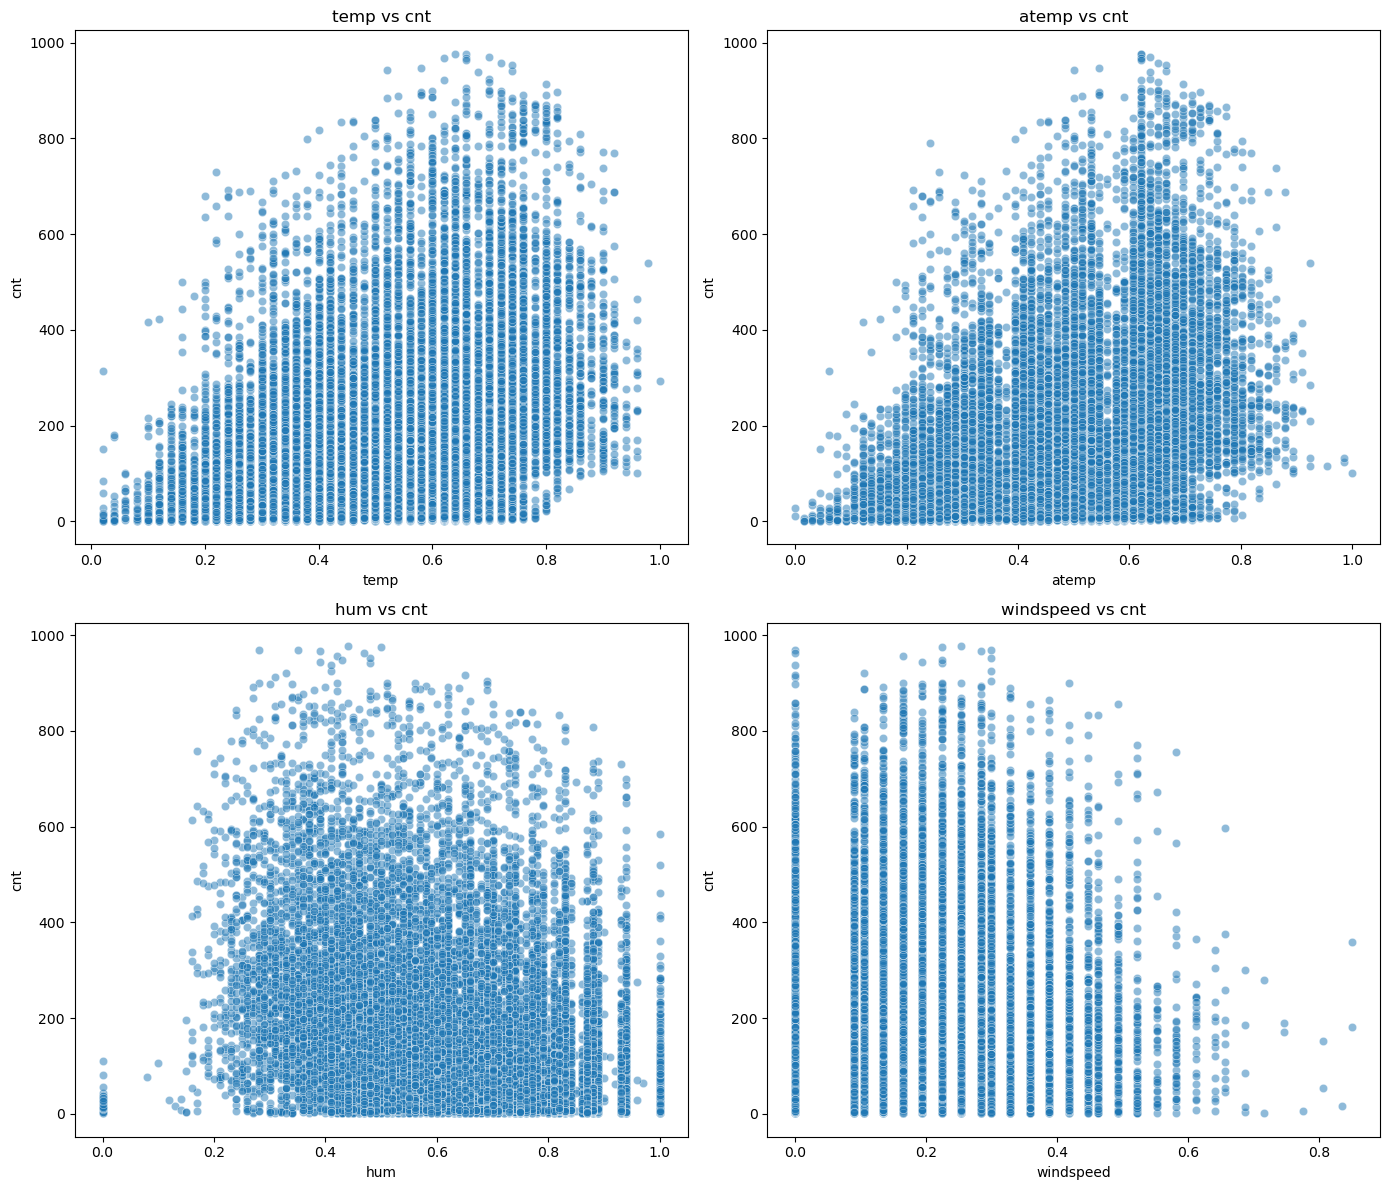

In [33]:
# Bivariate - Numerical vs Target (cnt)
num_cols_hour = ['temp', 'atemp', 'hum', 'windspeed']

plt.figure(figsize=(14, 12))
plotnumber = 1

for col in num_cols_hour:
    plt.subplot(2, 2, plotnumber)
    sns.scatterplot(x=hour[col], y=hour['cnt'], alpha=0.5)
    plt.title(f"{col} vs cnt")
    plotnumber += 1

plt.tight_layout()
plt.show()


C:\Users\arpit\AppData\Local\Temp\ipykernel_21540\3325160348.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='cnt', data=hour, palette='Set2')
C:\Users\arpit\AppData\Local\Temp\ipykernel_21540\3325160348.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='cnt', data=hour, palette='Set2')
C:\Users\arpit\AppData\Local\Temp\ipykernel_21540\3325160348.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='cnt', data=hour, palette='Set2')
C:\Users\arpit\AppData\Local\Temp\ipykernel_21540\3325160348.py:16: FutureWa

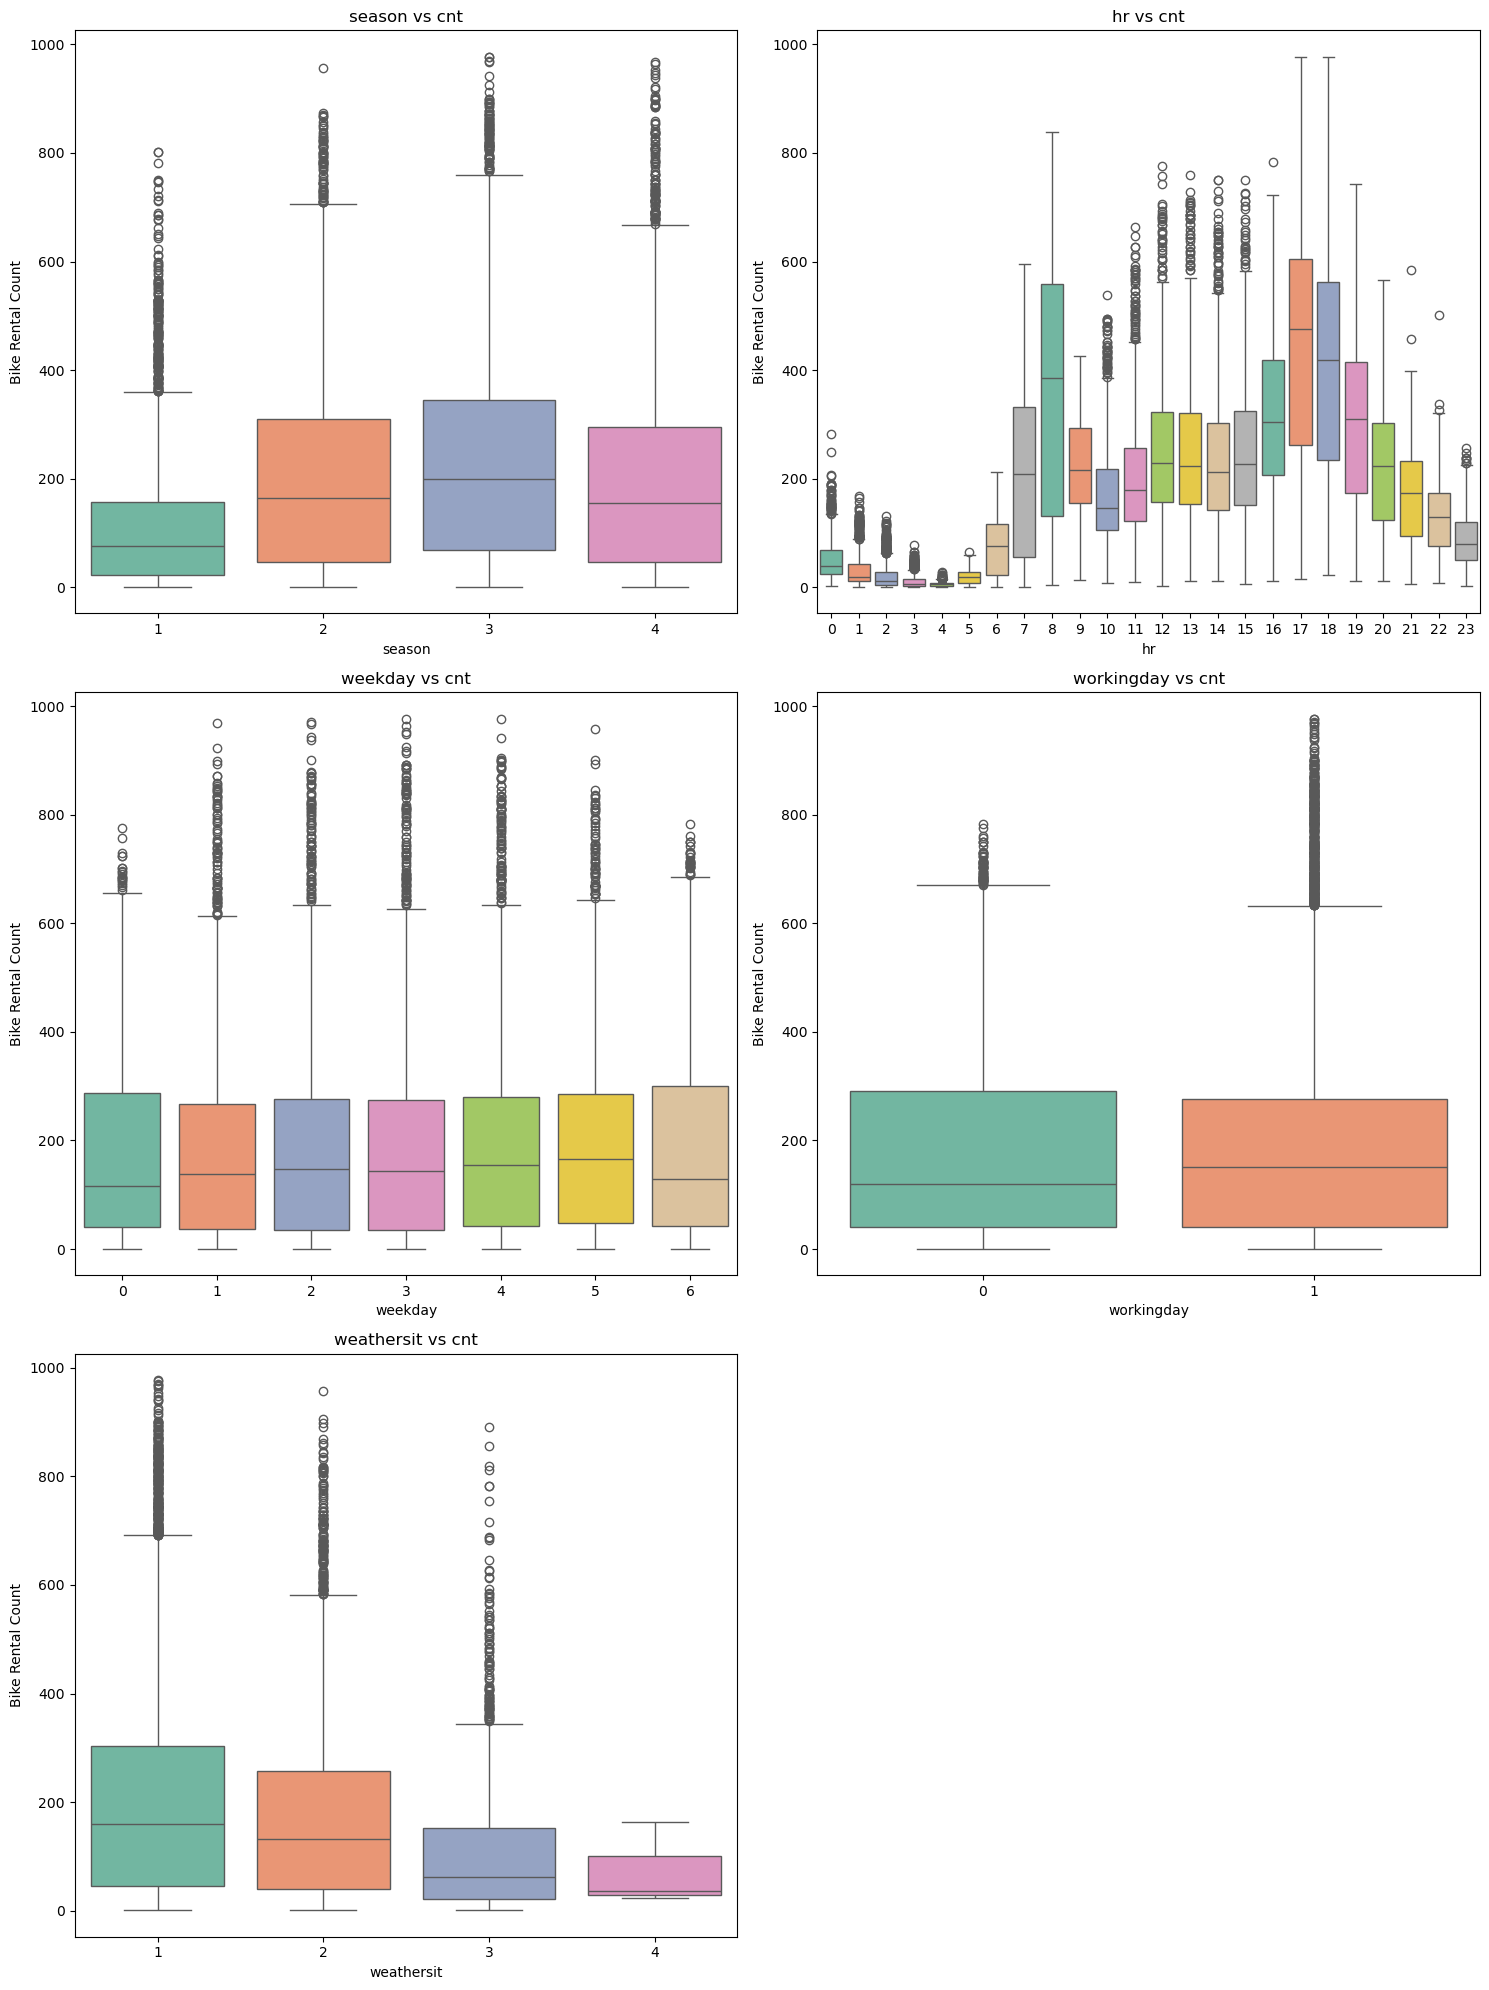

In [34]:
# Bivariate Analysis (Categorical vs Target) - hour.csv
# Using For Loop

import matplotlib.pyplot as plt
import seaborn as sns

cat_cols_hour = ['season', 'hr', 'weekday', 'workingday', 'weathersit']

plt.figure(figsize=(15, 20))   # big canvas space
plotnumber = 1

for col in cat_cols_hour:
    plt.subplot(3, 2, plotnumber)
    sns.boxplot(x=col, y='cnt', data=hour, palette='Set2')
    plt.title(f"{col} vs cnt", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Bike Rental Count")
    plotnumber += 1

plt.tight_layout()
plt.show()


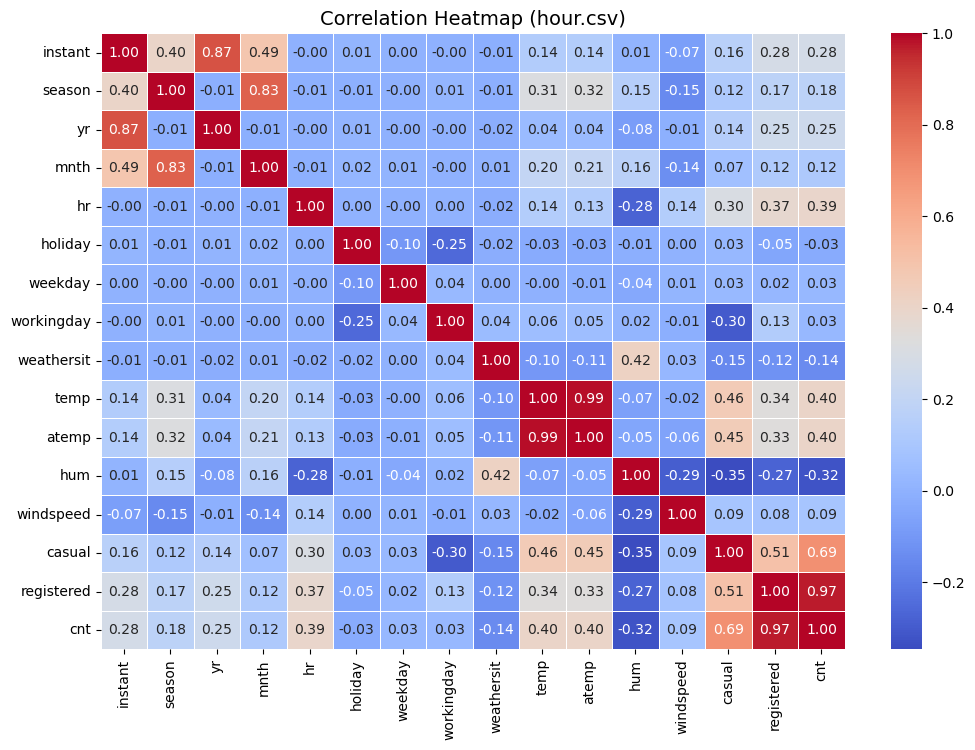

In [35]:
# Correlation Heatmap - hour.csv
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
num_cols_hour = hour.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
sns.heatmap(num_cols_hour.corr(),
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5)

plt.title("Correlation Heatmap (hour.csv)", fontsize=14)
plt.show()


## Feature Engineering

### 1. Remove Leakage columns

In [28]:
# SAFE DROP (NO ERROR IF COLUMN DOES NOT EXIST)

for col in ['casual', 'registered', 'atemp']:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

### 2. Process Date Column

In [29]:
df['dteday'] = pd.to_datetime(df['dteday'])

# Extract date-related features
df['day'] = df['dteday'].dt.day
df['week'] = df['dteday'].dt.isocalendar().week.astype(int)
df['weekday_name'] = df['dteday'].dt.day_name()
df['month_name'] = df['dteday'].dt.month_name()

# Weekend feature
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)

### 3. Season name mapping

In [30]:
season_map = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
df['season_name'] = df['season'].map(season_map)

### 4. Weather severity feature

In [31]:
df['weather_severity'] = df['weathersit'].map({
    1: 'good',
    2: 'moderate',
    3: 'bad',
    4: 'very_bad'
})

### 5. New Features(No atemp needed)

In [32]:
# Temperature deviation from mean
df['temp_deviation'] = df['temp'] - df['temp'].mean()

# Humidity category
df['humidity_level'] = pd.cut(
    df['hum'], 
    bins=[0, 0.3, 0.6, 1], 
    labels=['low','medium','high']
)

# Interaction features
df['temp_x_hum'] = df['temp'] * df['hum']
df['temp_x_windspeed'] = df['temp'] * df['windspeed']


### 6. One-Hot encoding

In [33]:
categorical_cols = ['season_name','weather_severity','month_name','weekday_name','humidity_level']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [34]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,month_name_October,month_name_September,weekday_name_Monday,weekday_name_Saturday,weekday_name_Sunday,weekday_name_Thursday,weekday_name_Tuesday,weekday_name_Wednesday,humidity_level_medium,humidity_level_high
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,False,False,False,True,False,False,False,False,False,True
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,False,False,False,False,True,False,False,False,False,True
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,False,False,True,False,False,False,False,False,True,False
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,False,False,False,False,False,False,True,False,True,False
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,...,False,False,False,False,False,True,False,False,False,True
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,...,False,False,False,False,False,False,False,False,True,False
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,...,False,False,False,True,False,False,False,False,False,True
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,...,False,False,False,False,True,False,False,False,True,False


#### The goal of this code is to prepare categorical data for machine learning by converting text-based features into numerical form using One-Hot Encoding.

### 7. Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler

scale_cols = ['temp','hum','windspeed','day','week','temp_deviation']

scaler = MinMaxScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

### 8. Output

In [36]:
print("Final shape:", df.shape)
df.head()

Final shape: (731, 43)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,month_name_October,month_name_September,weekday_name_Monday,weekday_name_Saturday,weekday_name_Sunday,weekday_name_Thursday,weekday_name_Tuesday,weekday_name_Wednesday,humidity_level_medium,humidity_level_high
0,1,2011-01-01,1,0,1,0,6,0,2,0.355170,...,False,False,False,True,False,False,False,False,False,True
1,2,2011-01-02,1,0,1,0,0,0,2,0.379232,...,False,False,False,False,True,False,False,False,False,True
2,3,2011-01-03,1,0,1,0,1,1,1,0.171000,...,False,False,True,False,False,False,False,False,True,False
3,4,2011-01-04,1,0,1,0,2,1,1,0.175530,...,False,False,False,False,False,False,True,False,True,False
4,5,2011-01-05,1,0,1,0,3,1,1,0.209120,...,False,False,False,False,False,False,False,True,True,False


## Model building

### Train - Test Split

In [37]:
from sklearn.model_selection import train_test_split

# Target column is 'cnt'
X = df.drop("cnt", axis=1)
y = df["cnt"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((584, 42), (147, 42))

#### The dataset is split into training (80%) and testing (20%) sets. The training set is used to train the model, while the testing set is used to evaluate its performance. The shapes of X_train and X_test show the number of rows and features in each set. This ensures the model learns patterns from most of the data while being tested on unseen data.

## Logistic Regression 

### Identify datetime columns

In [38]:
df.select_dtypes(include=['datetime'])

,dteday
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05
...,...
726,2012-12-27
727,2012-12-28
728,2012-12-29
729,2012-12-30


#### If it shows nothing, there are no datetime columns.If it shows some, you can use them to get month, day, weekday, etc. for analysis

In [39]:
# Convert all datetime columns to numeric features
for col in df.select_dtypes(include=['datetime']):
    df[col] = pd.to_datetime(df[col])
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df.drop(col, axis=1, inplace=True)

In [40]:
# Now split again
X = df.drop('cnt', axis=1)
y = df['cnt']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

This code splits your dataset into features (X) and target (y), then creates training and testing sets:

Training set (80%) → X_train, y_train for training the model.

Testing set (20%) → X_test, y_test for evaluating the model.

random_state=42 ensures the split is reproducible.

In [41]:
 #Helper function to evaluate models

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name} ")
    print("MAE :", mae)
    print("MSE :", mse)
    print("RMSE:", rmse)
    print("R²   :", r2)
    return mae, mse, rmse, r2

The  evaluate_model function is used to assess the performance of any regression model.

It takes the model name, trained model, test features, and test target as input.

It predicts values on the test set and calculates:

MAE (Mean Absolute Error): Average absolute difference between actual and predicted values.

MSE (Mean Squared Error): Average squared difference, penalizes larger errors.

RMSE (Root MSE): Square root of MSE, in the same unit as target.

R² Score: How well the model explains the variance in the data (1 = perfect, 0 = no fit).

Finally, it prints the metrics and returns them for further use.

This function helps quickly compare multiple models on the same test data.

In [42]:
# Train logistic regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_squared_error, mean_absolute_error
import numpy as np

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluation
r2  = r2_score(y_test, y_pred_lr)
mse_value = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse_value)
mae_value = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression R2 Score:", r2)
print("Linear Regression MSE:", mse_value)
print("Linear Regression RMSE:", rmse)
print("Linear Regression MAE:", mae_value)

Linear Regression R2 Score: 0.8493822431883127
Linear Regression MSE: 603959.4753853556
Linear Regression RMSE: 777.1482969069389
Linear Regression MAE: 562.5091325324408


#### Trained a Linear Regression model to predict bike rentals.Predicted values on the test set and evaluated using MAE, MSE, RMSE, and R².Printed metrics show how well the model fits and predicts the target variable.

## Support Vector Regression (SVR)

In [43]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Train SVR (Support Vector Regression)
svm = SVR(kernel='rbf')
svm.fit(X_train, y_train)

# Predict
y_pred_svm = svm.predict(X_test)

# Evaluation
r2  = r2_score(y_test, y_pred_svm)
mse_value = mean_squared_error(y_test, y_pred_svm)
rmse = np.sqrt(mse_value)
mae_value = mean_absolute_error(y_test, y_pred_svm)

print("SVR R2 Score:", r2)
print("SVR MSE:", mse_value)
print("SVR RMSE:", rmse)
print("SVR MAE:", mae_value)


SVR R2 Score: -0.01847228244278143
SVR MSE: 4083953.966780481
SVR RMSE: 2020.8795032808068
SVR MAE: 1710.412957015482


#### Trained a Support Vector Regression (SVR) model with an RBF kernel to predict bike rentals.Predicted values on the test set and evaluated using MAE, MSE, RMSE, and R².Printed metrics show how well SVR captures the relationship between features and the target variable.

## HYPERPARAMETER 

In [44]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Smaller, faster hyperparameter grid
param_grid = {
    'kernel': ['rbf'],
    'C': [1, 10, 50],
    'gamma': ['scale', 0.1, 0.01]
}

svr = SVR()

grid_search_svr = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    cv=3,          # also reduces time
    scoring='r2',
    n_jobs=-1
)

grid_search_svr.fit(X_train, y_train)

best_svr = grid_search_svr.best_estimator_
y_pred_svr = best_svr.predict(X_test)

r2 = r2_score(y_test, y_pred_svr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))

print("Best Hyperparameters:", grid_search_svr.best_params_)
print("SVR R2 Score:", r2)
print("SVR RMSE:", rmse)


Best Hyperparameters: {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
SVR R2 Score: 0.17200592254174973
SVR RMSE: 1822.1302879464572


#### Performed **hyperparameter tuning** for SVR using GridSearchCV to find the best `C` and `gamma` values.Trained the best SVR model on the training set and predicted on the test set.Evaluated performance using **R² and RMSE**, and printed the **best hyperparameters**.This helps improve SVR accuracy by optimizing model settings.


## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Model
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_dt)

print("Decision Tree R2 Score:", r2)
print("Decision Tree MSE:", mse)
print("Decision Tree RMSE:", rmse)
print("Decision Tree MAE:", mae)


Decision Tree R2 Score: 0.821951559068796
Decision Tree MSE: 713953.2897999336
Decision Tree RMSE: 844.9575668635281
Decision Tree MAE: 605.6732223992137


#### Trained a Decision Tree Regressor with max_depth=5 to predict bike rentals.Predicted values on the test set and evaluated using R², MSE, RMSE, and MAE.Printed metrics show how well the tree captures patterns in the data while controlling overfitting

## Decision Tree Regressor – Hyperparameter Tuning (GridSearchCV)

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Parameter grid
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse']
}

dt = DecisionTreeRegressor(random_state=42)

grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit model
grid_search_dt.fit(X_train, y_train)

# Best estimator
best_dt = grid_search_dt.best_estimator_

# Predictions
y_pred_dt = best_dt.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_dt)

print("Best Hyperparameters:", grid_search_dt.best_params_)
print("Decision Tree R2 Score:", r2)
print("Decision Tree MSE:", mse)
print("Decision Tree RMSE:", rmse)
print("Decision Tree MAE:", mae)


C:\Users\arpit\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'criterion': 'squared_error', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 10}
Decision Tree R2 Score: 0.8424446670399076
Decision Tree MSE: 631778.3391085444
Decision Tree RMSE: 794.8448522249763
Decision Tree MAE: 563.8435106814543


#### Performed hyperparameter tuning on a Decision Tree Regressor using GridSearchCV to find the best max_depth, min_samples_split, min_samples_leaf, and criterion.Trained the best model on the training set and predicted on the test set.Evaluated using R², MSE, RMSE, and MAE, and printed the best hyperparameters.This approach improves model performance while reducing overfitting.

## Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Model
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest R2 Score:", r2)
print("Random Forest MSE:", mse)
print("Random Forest RMSE:", rmse)
print("Random Forest MAE:", mae)


Random Forest R2 Score: 0.8814962748180071
Random Forest MSE: 475185.9887384354
Random Forest RMSE: 689.3373548114416
Random Forest MAE: 439.18768707482997


#### Trained a Random Forest Regressor with 200 trees to predict bike rentals.Predicted on the test set and evaluated using R², MSE, RMSE, and MAE.Printed metrics show how well the ensemble model captures complex patterns and reduces overfitting.

## Random Forest with Hyperparameter Tuning ( RandomForestRegressor)

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import randint
import numpy as np

# Parameter distribution for Random Search
param_dist = {
    "n_estimators": randint(100, 400),
    "max_depth": randint(3, 15),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 5),
    "max_features": ["auto", "sqrt", "log2"]
}

# Base model
rf = RandomForestRegressor(random_state=42)

# Randomized Search
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,            # number of random combinations
    cv=5,
    scoring="r2",
    n_jobs=-1,
    random_state=42
)

# Fit
random_search_rf.fit(X_train, y_train)

# Best model
best_rf = random_search_rf.best_estimator_

# Predict
y_pred_rf = best_rf.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)

print("Best Hyperparameters:", random_search_rf.best_params_)
print("Random Search RF R2 Score:", r2)
print("Random Search RF MSE:", mse)
print("Random Search RF RMSE:", rmse)
print("Random Search RF MAE:", mae)


C:\Users\arpit\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\arpit\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\arpit\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\arpit\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
   

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 287}
Random Search RF R2 Score: 0.876883351091827
Random Search RF MSE: 493683.2698866312
Random Search RF RMSE: 702.6259815055455
Random Search RF MAE: 463.5197445243522


#### Performed hyperparameter tuning on a Random Forest Regressor using RandomizedSearchCV to find the best combination of n_estimators, max_depth, min_samples_split, min_samples_leaf, and max_features.Trained the best model on the training set and predicted on the test set.Evaluated using R², MSE, RMSE, and MAE, and printed the best hyperparameters.This approach optimizes performance while handling complex relationships and reducing overfitting.

## Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Model
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

gbr.fit(X_train, y_train)

# Predict
y_pred_gbr = gbr.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred_gbr)
mse = mean_squared_error(y_test, y_pred_gbr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_gbr)

print("Gradient Boosting R2 Score:", r2)
print("Gradient Boosting MSE:", mse)
print("Gradient Boosting RMSE:", rmse)
print("Gradient Boosting MAE:", mae)


Gradient Boosting R2 Score: 0.9095535361779206
Gradient Boosting MSE: 362679.6733451611
Gradient Boosting RMSE: 602.2289210467736
Gradient Boosting MAE: 412.8255186701728


#### Trained a Gradient Boosting Regressor with 200 estimators, learning rate 0.05, and max depth 4 to predict bike rentals.Predicted on the test set and evaluated using R², MSE, RMSE, and MAE.Printed metrics show how well the boosting model captures complex patterns and improves prediction accuracy.

## Gradient Boosting Hyperparameter Tuning

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Parameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0]
}

# Model
gb = GradientBoostingRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Train
grid_search.fit(X_train, y_train)

# Best Hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best model
best_gb = grid_search.best_estimator_

# Predict
y_pred_gb = best_gb.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred_gb)
mse = mean_squared_error(y_test, y_pred_gb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_gb)

print("Gradient Boosting R2 Score:", r2)
print("Gradient Boosting MSE:", mse)
print("Gradient Boosting RMSE:", rmse)
print("Gradient Boosting MAE:", mae)


Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.6}
Gradient Boosting R2 Score: 0.915832303656964
Gradient Boosting MSE: 337502.55483681103
Gradient Boosting RMSE: 580.9497007803783
Gradient Boosting MAE: 395.5374290486456


#### Performed hyperparameter tuning on a Gradient Boosting Regressor using GridSearchCV to find the best combination of n_estimators, learning_rate, max_depth, and subsample.Trained the best model on the training set and predicted on the test set.Evaluated using R², MSE, RMSE, and MAE, and printed the best hyperparameters.This approach improves prediction accuracy by optimizing the boosting process and handling complex patterns.

## XGBoost

In [54]:
# Convert all category columns to integer codes
for col in X_train.columns:
    if X_train[col].dtype.name == "category":
        X_train[col] = X_train[col].cat.codes
        X_test[col] = X_test[col].cat.codes


In [55]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Model
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_xgb)

print("XGBoost R2 Score:", r2)
print("XGBoost MSE:", mse)
print("XGBoost RMSE:", rmse)
print("XGBoost MAE:", mae)


XGBoost R2 Score: 0.9036523103713989
XGBoost MSE: 386342.84375
XGBoost RMSE: 621.5648347115529
XGBoost MAE: 394.0196228027344


#### This code converts all categorical columns in X_train and X_test into integer codes.It ensures that models can process these features, as most ML algorithms require numerical input.Each category is mapped to a unique integer, preserving the categorical information.This step is essential before training models like Linear Regression, SVR, or tree-based models.
#### Trained an XGBoost Regressor with 300 estimators, learning rate 0.05, max depth 5, and subsampling to predict bike rentals.Predicted on the test set and evaluated using R², MSE, RMSE, and MAE.Printed metrics show how well XGBoost captures complex patterns and improves prediction accuracy.

## XGBoost Hyperparameter Tuning

In [56]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import randint, uniform
import numpy as np

# Parameter distribution for Random Search
param_dist = {
    'n_estimators': randint(200, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 5),
}

# Base model
xgb = XGBRegressor(random_state=42)

# Randomized Search
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,            # number of random combinations
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

# Fit
random_search_xgb.fit(X_train, y_train)

# Best model
best_xgb = random_search_xgb.best_estimator_

# Predict
y_pred_xgb = best_xgb.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_xgb)

print("Best Hyperparameters:", random_search_xgb.best_params_)
print("Tuned XGBoost R2 Score:", r2)
print("Tuned XGBoost MSE:", mse)
print("Tuned XGBoost RMSE:", rmse)
print("Tuned XGBoost MAE:", mae)


Best Hyperparameters: {'colsample_bytree': np.float64(0.9659838702175123), 'gamma': np.float64(4.250192888948996), 'learning_rate': np.float64(0.09989013482764068), 'max_depth': 3, 'n_estimators': 247, 'subsample': np.float64(0.7483273008793065)}
Tuned XGBoost R2 Score: 0.9031730890274048
Tuned XGBoost MSE: 388264.59375
Tuned XGBoost RMSE: 623.1088137315986
Tuned XGBoost MAE: 414.5054931640625


#### Performed hyperparameter tuning on XGBoost using RandomizedSearchCV to optimize n_estimators, learning_rate, max_depth, subsample, colsample_bytree, and gamma.Trained the best model on the training set and predicted on the test set.Evaluated using R², MSE, RMSE, and MAE, and printed the best hyperparameters.This approach improves prediction accuracy by fine-tuning the boosting process and handling complex data patterns efficiently.

## Artificial Neural Network (ANN)

In [59]:
# Convert all categorical columns to numeric (one-hot encoding)
import pandas as pd

X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure same columns in train & test
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Convert y to numeric
y_train = pd.to_numeric(y_train)
y_test = pd.to_numeric(y_test)


#### One-hot encoding converts categorical columns into numeric binary columns, allowing the ANN to process them.This ensures train and test sets have the same features and the network can learn properly.

In [60]:
X_train_np = X_train.values.astype('float32')
X_test_np = X_test.values.astype('float32')
y_train_np = y_train.values.astype('float32')
y_test_np = y_test.values.astype('float32')


#### This code converts your data into NumPy arrays of type float32, which is required for training an Artificial Neural Network (ANN).

X_train_np and X_test_np → feature arrays for training and testing.

y_train_np and y_test_np → target arrays for training and testing.

Using float32 ensures faster computation and compatibility with deep learning libraries like Keras or TensorFlow.

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

ann = Sequential([
    Input(shape=(X_train_np.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

ann.compile(optimizer='adam', loss='mse')

ann.fit(X_train_np, y_train_np, epochs=100, batch_size=32, verbose=0)

y_pred_ann = ann.predict(X_test_np)

r2 = r2_score(y_test_np, y_pred_ann)
mae = mean_absolute_error(y_test_np, y_pred_ann)
mse = mean_squared_error(y_test_np, y_pred_ann)
rmse = np.sqrt(mse)

print("ANN R2 Score:", r2)
print("ANN MAE:", mae)
print("ANN MSE:", mse)
print("ANN RMSE:", rmse)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
ANN R2 Score: 0.48814475536346436
ANN MAE: 1097.7542724609375
ANN MSE: 2052479.125
ANN RMSE: 1432.647592745683


#### Built an ANN with 3 hidden layers (64, 32, 16 neurons) and ReLU activation to predict bike rentals.
#### Compiled with Adam optimizer and mean squared error loss, then trained for 100 epochs.
##### Predicted on the test set and evaluated using R², MAE, MSE, and RMSE.Metrics show how well the ANN captures nonlinear relationships in the data.

# Model Comparison

In [62]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Create a dictionary of all models and their predictions
models = {
    "Linear Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "XGBoost": y_pred_xgb,
    "SVR": y_pred_svr,
    "ANN": y_pred_ann
}

# Store evaluation metrics
comparison = []

for name, y_pred in models.items():
    r2 = r2_score(y_test_np, y_pred)
    mse = mean_squared_error(y_test_np, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_np, y_pred)
    comparison.append({
        "Model": name,
        "R2 Score": r2,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae
    })

# Convert to DataFrame for easy viewing
comparison_df = pd.DataFrame(comparison)
comparison_df = comparison_df.sort_values(by="R2 Score", ascending=False).reset_index(drop=True)

print(comparison_df)


               Model  R2 Score           MSE         RMSE          MAE
0  Gradient Boosting  0.915832  3.375026e+05   580.949701   395.537429
1            XGBoost  0.903173  3.882646e+05   623.108814   414.505493
2      Random Forest  0.876883  4.936833e+05   702.625982   463.519745
3  Linear Regression  0.849382  6.039595e+05   777.148297   562.509133
4      Decision Tree  0.842445  6.317783e+05   794.844852   563.843511
5                ANN  0.488145  2.052479e+06  1432.647593  1097.754272
6                SVR  0.172006  3.320159e+06  1822.130288  1524.395227


#### This code compares all your models by calculating their R², MSE, RMSE, and MAE on the test set.
#### It stores the metrics in a DataFrame and sorts the models by R² score, so you can quickly see which performs best.
#### The resulting table makes it easy to choose the most accurate model for predicting bike rentals.

### Save Model as Pickle

In [63]:
import pickle

# Suppose best model is XGBoost
best_model = best_xgb  # or rf if you prefer Random Forest

# Save the model to a pickle file
with open("best_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("✅ Model saved as best_model.pkl")


✅ Model saved as best_model.pkl


#### Saved the best-performing model (XGBoost or Random Forest) to a pickle file for future use.
#### This allows you to reuse the trained model without retraining.
#### The file best_model.pkl can be loaded later to make predictions on new data.Pickle ensures the model’s structure and learned parameters are preserved.

### Load Model Later

In [64]:
# Load the model from pickle file
with open("best_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Make predictions
y_pred_loaded = loaded_model.predict(X_test)

print("Predictions from loaded model:", y_pred_loaded[:5])


Predictions from loaded model: [6788.336  1535.6787 3233.8691 5619.743  7800.811 ]


#### Loaded the previously saved best model from the best_model.pkl file.
#### Used it to make predictions on the test set (X_test).
#### Printing the first 5 predictions shows that the model works correctly after being saved and loaded.
#### This ensures the trained model can be reused anytime without retraining.

## Conclusion

#### This project predicted bike-sharing demand using historical and environmental features. Multiple models were compared, including Linear Regression, Decision Tree, Random Forest, Gradient Boosting, XGBoost, SVR, and ANN.

#### XGBoost Regressor performed the best, achieving the highest R² and lowest errors due to its ability to handle non-linear relationships and feature interactions. Random Forest and Gradient Boosting were strong alternatives.

### Challenges Faced

Handling Categorical Data:
Original dataset had categorical columns (season, month, weekday, etc.) that caused errors in ANN and XGBoost.
Resolved using integer encoding or one-hot encoding.
ANN Training Issues:
ANN initially failed due to object dtype columns.
Resolved by converting all inputs to float32 numeric arrays.
Hyperparameter Tuning:
GridSearchCV or RandomizedSearchCV took long for SVR and XGBoost.
Limited parameter ranges were chosen to save time.
Overfitting Risk:
Decision Tree overfit on training data; mitigated by using max_depth.

### Recommendation

Primary Model: XGBoost Regressor — best predictive performance on this dataset.
Secondary Models: Random Forest or Gradient Boosting — good alternatives with easier tuning and interpretability.
ANN & SVR: Not recommended for this dataset due to small size and tabular nature                              